In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import imageio

In [2]:
#%% Discrete Cosine Transform 
def dct2(x):
    return spfft.dct(spfft.dct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

def idct2(x):
    return spfft.idct(spfft.idct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

In [5]:
#%% VARIABLES FOR YOU TO CHANGE
path_to_your_image="umbrella.png"
zoom_out=0.9999999 #Fraction of the image you want to keep.
corruption=0.6#Fraction of the pixels that you want to discard
#%% Get image and create y
# read original image and downsize for speed
Xorig =imageio.imread(path_to_your_image, pilmode='L') # read in grayscale
XorigRGB =imageio.imread(path_to_your_image, pilmode='RGB') # read in RGB
#Downsize image 
XR = spimg.zoom(XorigRGB[:, :, 0], zoom_out)
XG = spimg.zoom(XorigRGB[:, :, 1], zoom_out)
XB = spimg.zoom(XorigRGB[:, :, 2], zoom_out)
X = spimg.zoom(Xorig, zoom_out)

nyR,nxR = XR.shape
nyG,nxG = XG.shape
nyB,nxB = XB.shape
ny,nx = X.shape

# extract small sample of signal
corruption=1-corruption
k = round(nx * ny * corruption) 
ri = np.random.choice(nx * ny, k, replace=False) # random sample of indices
b = X.T.flat[ri]
b = np.expand_dims(b, axis=1)

bR = XR.T.flat[ri]
bR = np.expand_dims(bR, axis=1)

bG = XG.T.flat[ri]
bG = np.expand_dims(bG, axis=1)

bB = XB.T.flat[ri]
bB = np.expand_dims(bB, axis=1)

#%% CREATE A inverse and C
# *******************************************************************************************
# create dct matrix operator using kron (memory errors for large ny*nx)
Aa = np.kron(
    np.float16(spfft.idct(np.identity(nx), norm='ortho', axis=0)),
    np.float16(spfft.idct(np.identity(ny), norm='ortho', axis=0))
    )
A = Aa[ri,:] # same as B times A
# *******************************************************************************************

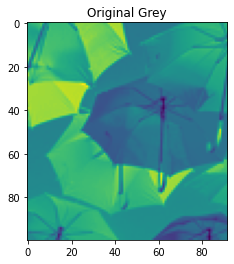

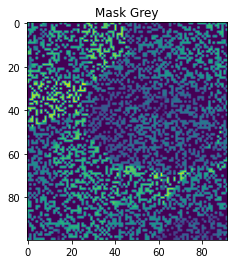

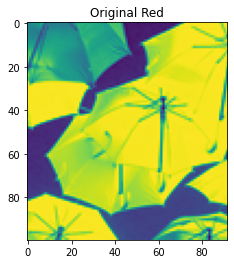

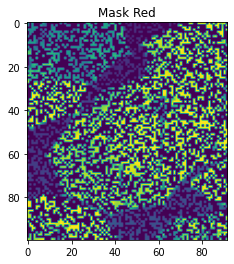

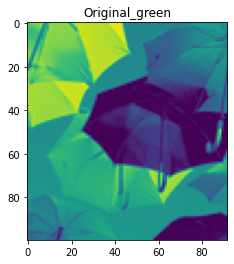

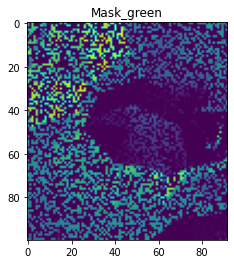

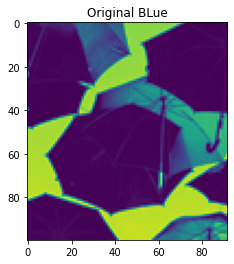

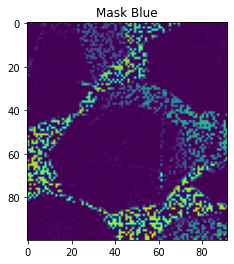

In [6]:
# create images of mask (for visualization)
mask = np.zeros(X.shape)
mask.T.flat[ri] = True
mask[mask==0]=False
masked=X*mask
Xm = 255 * np.ones(X.shape)
Xm.T.flat[ri] = X.T.flat[ri]
#%%
plt.imshow(X)
plt.title("Original Grey")
plt.show()

plt.imshow(masked)
plt.title("Mask Grey")
plt.show()
#%% SAVE MATRICES TO DRIVE

np.save('C_grey',A)
np.save('A_inv_grey',Aa)
np.save('y_grey',b)
plt.imsave('incomplete_grey.png',Xm)
plt.imsave('original_with_crop_grey.png',X)

# *******************************************************************************************

# create images of mask (for visualization) **RED**
mask = np.zeros(XR.shape)
mask.T.flat[ri] = True
mask[mask==0]=False
masked=XR*mask
Xm = 255 * np.ones(XR.shape)
Xm.T.flat[ri] = XR.T.flat[ri]
#%%
plt.imshow(XR)
plt.title("Original Red")
plt.show()

plt.imshow(masked)
plt.title("Mask Red")
plt.show()
#%% SAVE MATRICES TO DRIVE

np.save('C_red',A)
np.save('A_inv_red',Aa)
np.save('y_red',bR)
plt.imsave('incomplete_red.png',Xm)
plt.imsave('original_with_crop_red.png',XR)

# *******************************************************************************************

# create images of mask (for visualization) **Green**
mask = np.zeros(XG.shape)
mask.T.flat[ri] = True
mask[mask==0]=False
masked=XG*mask
Xm = 255 * np.ones(XG.shape)
Xm.T.flat[ri] = XG.T.flat[ri]
#%%
plt.imshow(XG)
plt.title("Original_green")
plt.show()

plt.imshow(masked)
plt.title("Mask_green")
plt.show()
#%% SAVE MATRICES TO DRIVE

np.save('C_green',A)
np.save('A_inv_green',Aa)
np.save('y_green',bG)
plt.imsave('incomplete_green.png',Xm)
plt.imsave('original_with_crop_green.png',XG)

# *******************************************************************************************

# create images of mask (for visualization) **Blue**
mask = np.zeros(XB.shape)
mask.T.flat[ri] = True
mask[mask==0]=False
masked=XB*mask
Xm = 255 * np.ones(XB.shape)
Xm.T.flat[ri] = XB.T.flat[ri]
#%%
plt.imshow(XB)
plt.title("Original BLue")
plt.show()

plt.imshow(masked)
plt.title("Mask Blue")
plt.show()
#%% SAVE MATRICES TO DRIVE

np.save('C_blue',A)
np.save('A_inv_blue',Aa)
np.save('y_blue',bB)
plt.imsave('incomplete_blue.png',Xm)
plt.imsave('original_with_crop_blue.png',XB)